# PS Machin Learning Project - Financial Transaktions

The goal of this project is to determine if a financial transaktion is fraudulent. In this notebook the used model to solve this aproach is the logistic regression model. Financial transaktion is a binary classification problem.

## Logistic Regression 
Logistic regression is besides linear regression a part of the regression family and belongs to the machine learning paradigm of supervised learning. In regression the relationship between the independent features and the depending outcome is analysed. The goal is to train the model so that it understands the relation between features and corresponding outcome and it can predict the correct outcome just by using the features. 

Logistic regression uses the sigmoid function to determine the relationship between features and outcome. It is used for classification and can be used in cases where the resulting outcome only has two possible values. In the case of financial transactions the two available outcomes are fraudulent or not fraudulent transactions, where fraudulent has the value 1 and not fraudulent is symbolised with 0. Which means the model is a suitable classifier for binary classification problems. Logistic regression also can determine the probability of the occurrence of an outcome. Since the model is working with probabilities the outcome is between 0 and 1, where 1 implies a 100% chance of fraud and 0 a not fraudulent transaction.    

##### In this notebook the logistic regression model provided by sklearn is used. 

## 1. Dataset
The dataset which is used consists of 227.845 entries of financal transactions. 
Each entry hast 28 features, a time , an amount and a class. 
The class has values of 0 or 1 where 1 symbolises a fraudulent transactions.  

#### 1.1 Import the dataset and libraries.
The path for importing the dataset may have to be modified depending on where this notebook is executed.

In [6]:
# Import numpy, pandas, pickle and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#for storing the model
import pickle

# From sklearn import ...
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

# Counter for figures
figcount = 0
# Set the random seed for reproducing results. Use an integer to have repeatable results
random_seed = 100
np.random.seed(random_seed)

In [7]:
# Import the training data set
path = "/data/mlproject22" if os.path.exists("/data/mlproject22") else "."
train_data = pd.read_csv(os.path.join(path, "transactions.csv"))

### 1.2 Load and prepare the data 

In [8]:
# Get the names of all columns of the set
data_col = list(train_data.columns.values)
feature_names = data_col[1:30]

# Fetch the target column 
Y = train_data['Class']

# remove the colums that are not needed
# now only feature 0 to 27 are used
drop_labels = (["Class", "Time", "Amount"])
X = train_data.drop(columns = drop_labels)

### 1.3 Split and normalize the data 
Split the data into training and test data. 

In [9]:
def split_and_normalize_data(X, Y):
    # Split into train and test sets
    # 30% of the set will be used for testing and 70% for trainung the model
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

    # Center and normalize the train data to have 0 mean and 1 standard deviation
    scaler  = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)

    # Scale the test data in the same way as the train data
    X_test = scaler.transform(X_test) 

    # Printing shape of data
    print('X_train.shape: {}'.format(X_train.shape))
    print('Y_train.shape: {}'.format(Y_train.shape))
    print('X_test.shape: {}'.format(X_test.shape))
    print('Y_test.shape: {}'.format(Y_test.shape))

    return X_train, X_test, Y_train, Y_test

### 1.4 Visualise the test data 
This visualisation was only used for finding good features. 

In [10]:
"""
# Visualize the test data for the features
X_train, X_test, Y_train, Y_test = split_and_normalize_data(X, Y)

for i in {8, 9, 12}:
    fig = plt.figure(figsize=(20, 7))
    # create a 3D object 
    ax = fig.add_subplot(111, projection='3d')

    xs = X_test[:,16]
    ys = X_test[:,13]
    zs = X_test[:,i]

    # plotting the datapoints in the 3D object
    ax.scatter(xs=xs, ys=ys, zs=zs, c= Y_test,cmap=plt.cm.Set1, edgecolor="k", s=40)
    ax.set_xlabel("Principal Component 16")
    ax.set_ylabel("Principal Component 13")
    ax.set_zlabel("Principal Component {}".format(i))
    plt.show()

    fig = plt.figure(figsize=(20, 7))
    # create a 3D object 
    ax = fig.add_subplot(111, projection='3d')

    xs = X_test[:,i]
    ys = X_test[:,13]
    zs = X_test[:,16]

    # plotting the datapoints in the 3D object
    ax.scatter(xs=xs, ys=ys, zs=zs, c= Y_test,cmap=plt.cm.Set1, edgecolor="k", s=40)
    ax.set_xlabel("Principal Component {}".format(i))
    ax.set_ylabel("Principal Component 13")
    ax.set_zlabel("Principal Component 16")
    plt.show()

    fig = plt.figure(figsize=(20, 7))
    # create a 3D object 
    ax = fig.add_subplot(111, projection='3d')

    xs = X_test[:,13]
    ys = X_test[:,i]
    zs = X_test[:,16]

    # plotting the datapoints in the 3D object
    ax.scatter(xs=xs, ys=ys, zs=zs, c= Y_test,cmap=plt.cm.Set1, edgecolor="k", s=40)
    ax.set_xlabel("Principal Component 13")
    ax.set_ylabel("Principal Component {}".format(i))
    ax.set_zlabel("Principal Component 16")
    plt.show()

fig = plt.figure(figsize=(20, 7))
for i in {8, 9, 12}:
    plt.subplot(7, 4, i+1)
    xs = X_train[:,16]
    ys = X_train[:,i]
    plt.scatter(x=xs, y=ys, c= Y_train,cmap=plt.cm.Set1, edgecolor="k", s=20)   
    plt.xlabel("Principal Component 16")
    plt.ylabel("Principal Component {}".format(i))
plt.show()
"""

'\n# Visualize the test data for the features\nX_train, X_test, Y_train, Y_test = split_and_normalize_data(X, Y)\n\nfor i in {8, 9, 12}:\n    fig = plt.figure(figsize=(20, 7))\n    # create a 3D object \n    ax = fig.add_subplot(111, projection=\'3d\')\n\n    xs = X_test[:,16]\n    ys = X_test[:,13]\n    zs = X_test[:,i]\n\n    # plotting the datapoints in the 3D object\n    ax.scatter(xs=xs, ys=ys, zs=zs, c= Y_test,cmap=plt.cm.Set1, edgecolor="k", s=40)\n    ax.set_xlabel("Principal Component 16")\n    ax.set_ylabel("Principal Component 13")\n    ax.set_zlabel("Principal Component {}".format(i))\n    plt.show()\n\n    fig = plt.figure(figsize=(20, 7))\n    # create a 3D object \n    ax = fig.add_subplot(111, projection=\'3d\')\n\n    xs = X_test[:,i]\n    ys = X_test[:,13]\n    zs = X_test[:,16]\n\n    # plotting the datapoints in the 3D object\n    ax.scatter(xs=xs, ys=ys, zs=zs, c= Y_test,cmap=plt.cm.Set1, edgecolor="k", s=40)\n    ax.set_xlabel("Principal Component {}".format(i))\n

## 2. Logistic Regression Model 
In this section the basic functions for the logistic regression model will be defined. The logistic regression model from sklearn is used for the implementation.
### 2.1 Train the Model 
Train the model with the training data. 

In [11]:
def train_model(X_train_data, Y_train_data):
    """
    This function trains the logistc regression model with the given parameters

    :parm: X_train_data the independent features 
    :param: Y_train_data the depent class 

    """
    model = LogisticRegression()
    model.fit(X_train_data, Y_train_data)

    return model

### 2.2 Test the Model
Test the trained model with the test data. And evaluate the outcome of the predictions of the model.

In [12]:
def model_predictions(model, X_test_data):
    predictions = model.predict(X_test_data)
    return predictions

In [13]:
from sklearn.metrics import confusion_matrix

def evaluate_predictions(Y_test_data, X_test_data, predictions, model):
    """
    Funtion that computes the accuracy of the model on the training data set.

    :param Y_test_data: the class of the test data  
    :param X_test_data: the features of the test data 
    :param predictions: the prediction for the class made by the model
    :param model: the trained model 

    """
    # evaluate the accuracy of the predictions
    TN, FP, FN, TP = confusion_matrix(Y_test_data, predictions).ravel()

    accuracy = model.score(X_test_data,Y_test_data)

    print('True Fraudulent(TP)  = ', TP)
    print('False Fraudulent(FP) = ', FP)
    print('True Not Fraudulent(TN)  = ', TN)
    print('False Not Fraudulent(FN) = ', FN)
    print('Accuracy of the binary classification = ', accuracy)
    
    return TP, FP, TN, FN, accuracy


### 2.3 Decition Function Values of the Model
The return array of this function should contain a single decision function value for each transaction, indicating whether the transaction is fraudulent (i.e. it belongs to target class 1). The higher the decision function value, the more likely that the transaction is fraud.

In [14]:
def decition_function(model, X_test_data):
    decition_function_values = model.decision_function(X_test_data)
    return decition_function_values

## 3. Reduce Dimension of the Data

Logistic regression uses a hyperplane in a space with the dimension of the number of the features. Using all 28 features means the resulting hyperplane is 27 dimensional in a 28 dimensional space. This will not only make the representation of the data difficult but it can also result in overfitting and have a negativ impact on new unseen data. 
To avoid this the features are going to be reduced. 

### 3.1 Selected Features
In this section the model is trained and tested with the selected features 9, 12, 13 and 16. This features were selected because after looking at different combinations of all features these fore seperate the fraudulent and non fraudulent transactions well. 

In [15]:
# select the features
used_features = []
used_features.append(feature_names[9])
used_features.append(feature_names[12])
used_features.append(feature_names[13])
used_features.append(feature_names[16])

X_feature_selection = X[used_features]

print(X_feature_selection.shape)

#split and normalise the data 
X_train, X_test, Y_train, Y_test = split_and_normalize_data(X_feature_selection, Y)

# train the model 
model_feature_selection = train_model(X_train, Y_train)

#test the accuracy of the model
predictions_feature_selection = model_predictions(model_feature_selection, X_test)

print("The evaluation of the model with the selected features:")
accuracy_selcetion = evaluate_predictions(Y_test, X_test, predictions_feature_selection, model_feature_selection)

(227845, 4)
X_train.shape: (159491, 4)
Y_train.shape: (159491,)
X_test.shape: (68354, 4)
Y_test.shape: (68354,)
The evaluation of the model with the selected features:
True Fraudulent(TP)  =  76
False Fraudulent(FP) =  5
True Not Fraudulent(TN)  =  68237
False Not Fraudulent(FN) =  36
Accuracy of the binary classification =  0.9994001814085496


#### 3.1.1 Visualise result of selectet features approach
Visualize the test data for the real class assigned, the predicted class and the incorrect predicted class. The selected features 9, 12, 13 and 16 are used for the plots.

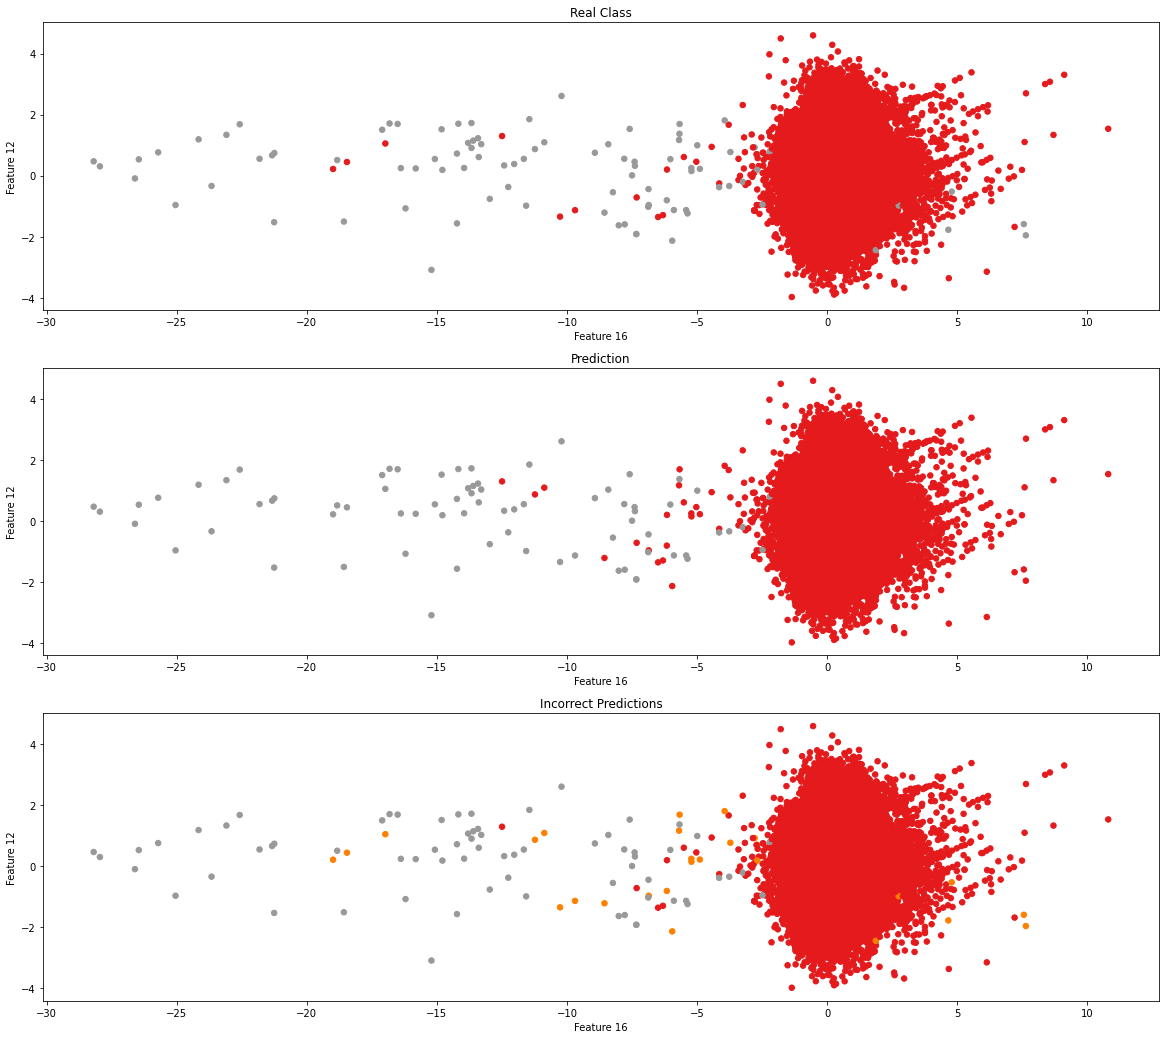

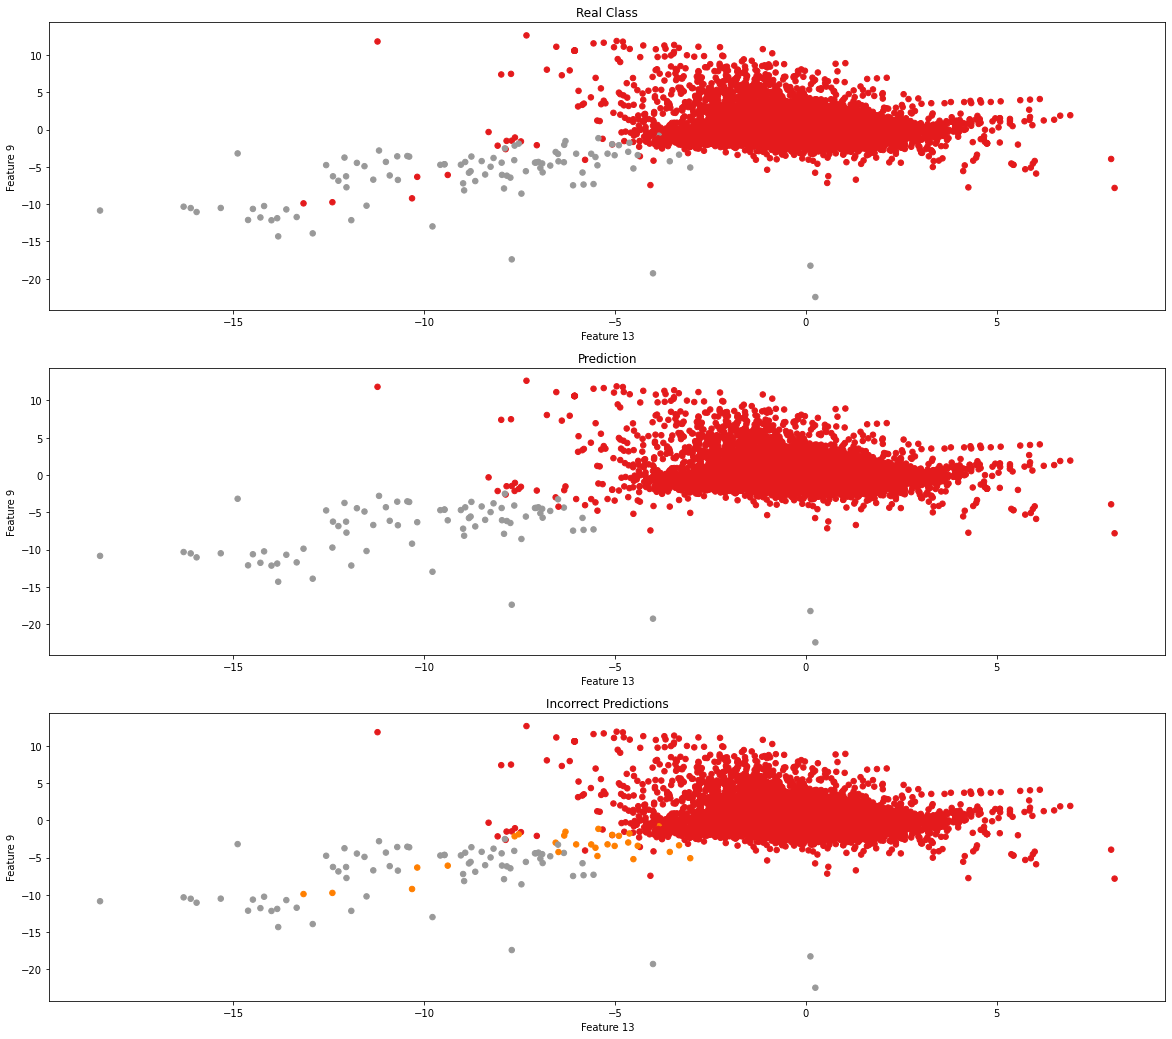

In [16]:
fig = plt.figure(figsize=(20, 18)) 
plt.subplot(3, 1, 1)
xs = X_test[:,3]
ys = X_test[:,1]
plt.scatter(x=xs, y=ys, c= Y_test,cmap=plt.cm.Set1, s=30)
plt.title("Real Class")
plt.xlabel("Feature 16")
plt.ylabel("Feature 12")
            
plt.subplot(3, 1, 2)
plt.scatter(x=xs, y=ys, c= predictions_feature_selection,cmap=plt.cm.Set1, s=30)
plt.title("Prediction")
plt.xlabel("Feature 16")
plt.ylabel("Feature 12")
            
plt.subplot(3, 1, 3)
plt.scatter(x=xs, y=ys, c= (Y_test + predictions_feature_selection),cmap=plt.cm.Set1, s=30)
plt.title("Incorrect Predictions")
plt.xlabel("Feature 16")
plt.ylabel("Feature 12")
plt.show()


fig = plt.figure(figsize=(20, 18)) 
plt.subplot(3, 1, 1)
xs = X_test[:,2]
ys = X_test[:,0]
plt.scatter(x=xs, y=ys, c= Y_test,cmap=plt.cm.Set1, s=30)
plt.title("Real Class")
plt.xlabel("Feature 13")
plt.ylabel("Feature 9")

plt.subplot(3, 1, 2)
plt.scatter(x=xs, y=ys, c= predictions_feature_selection,cmap=plt.cm.Set1, s=30)
plt.title("Prediction")
plt.xlabel("Feature 13")
plt.ylabel("Feature 9")

plt.subplot(3, 1, 3)
plt.scatter(x=xs, y=ys, c= (Y_test + predictions_feature_selection),cmap=plt.cm.Set1, s=30)
plt.title("Incorrect Predictions")
plt.xlabel("Feature 13")
plt.ylabel("Feature 9")
plt.show()


### 3.2 PCA (Principal component analzsis)

For reduncing the dimesnion PCA is used to remove reduntant features. We are going to test fore variations of. The fertures will be reduced to 15, 10 , 5 and 3. This will display how much the dimension can be reduced. 

In [17]:
# import the PCA from sklearn
from sklearn.decomposition import PCA

def use_PCA(n_componenets):

    # set the number of kept fertures to n
    pca = PCA(n_components=n_componenets)
    pca.fit(X)
    # apply dimensionality reduction to X.
    X_dim = pca.transform(X)

    return X_dim

In [18]:
# set the number of kept fertures to 15
X_dim15 = use_PCA(15)

# set the number of kept fertures to 10
X_dim10 = use_PCA(10)

# set the number of kept fertures to 5
X_dim5 = use_PCA(5)

# set the number of kept fertures to 3
X_dim3 = use_PCA(3)

# set the number of kept fertures to 2
X_dim2 = use_PCA(2)


print('X_dim15.shape: {}'.format(X_dim15.shape))
print('X_dim10.shape: {}'.format(X_dim10.shape))
print('X_dim5.shape: {}'.format(X_dim5.shape))
print('X_dim3.shape: {}'.format(X_dim3.shape))
print('X_dim2.shape: {}'.format(X_dim2.shape))


X_dim15.shape: (227845, 15)
X_dim10.shape: (227845, 10)
X_dim5.shape: (227845, 5)
X_dim3.shape: (227845, 3)
X_dim2.shape: (227845, 2)


#### 3.2.1 Split and normalize the data 
Split the data into training and test data. 

In [19]:
# Split into train and test set for 15 dimentions
X_train_dim15, X_test_dim15, Y_train_dim15, Y_test_dim15 = split_and_normalize_data(X_dim15, Y)

# Split into train and test set for 10 dimentions
X_train_dim10, X_test_dim10, Y_train_dim10, Y_test_dim10 = split_and_normalize_data(X_dim10, Y)

# Split into train and test set for 5 dimentions
X_train_dim5, X_test_dim5, Y_train_dim5, Y_test_dim5  = split_and_normalize_data(X_dim5, Y)

# Split into train and test set for 3 dimentions
X_train_dim3, X_test_dim3, Y_train_dim3, Y_test_dim3  = split_and_normalize_data(X_dim3, Y)

# Split into train and test set for 2 dimentions
X_train_dim2, X_test_dim2, Y_train_dim2, Y_test_dim2  = split_and_normalize_data(X_dim2, Y)

X_train.shape: (159491, 15)
Y_train.shape: (159491,)
X_test.shape: (68354, 15)
Y_test.shape: (68354,)
X_train.shape: (159491, 10)
Y_train.shape: (159491,)
X_test.shape: (68354, 10)
Y_test.shape: (68354,)
X_train.shape: (159491, 5)
Y_train.shape: (159491,)
X_test.shape: (68354, 5)
Y_test.shape: (68354,)
X_train.shape: (159491, 3)
Y_train.shape: (159491,)
X_test.shape: (68354, 3)
Y_test.shape: (68354,)
X_train.shape: (159491, 2)
Y_train.shape: (159491,)
X_test.shape: (68354, 2)
Y_test.shape: (68354,)


#### 3.2.2 Train and test the model with the analysed PCA data set 

In [20]:
print("15 dimensions:")
model_dim15 = train_model(X_train_dim15, Y_train_dim15)
predictions_dim15 = model_predictions(model_dim15, X_test_dim15)
accuracy_PCA_15 = evaluate_predictions(Y_test_dim15, X_test_dim15, predictions_dim15, model_dim15)

print("10 dimensions:")
model_dim10 = train_model(X_train_dim10, Y_train_dim10)
predictions_dim10 = model_predictions(model_dim10, X_test_dim10)
accuracy_PCA_10 = evaluate_predictions(Y_test_dim10, X_test_dim10, predictions_dim10, model_dim10)

print("5 dimensions:")
model_dim5 = train_model(X_train_dim5, Y_train_dim5)
predictions_dim5 = model_predictions(model_dim5, X_test_dim5)
accuracy_PCA_5 = evaluate_predictions(Y_test_dim5, X_test_dim5, predictions_dim5, model_dim5)

print("3 dimensions:")
model_dim3 = train_model (X_train_dim3, Y_train_dim3)
predictions_dim3 = model_predictions(model_dim3, X_test_dim3)
accuracy_PCA_3 = evaluate_predictions(Y_test_dim3, X_test_dim3, predictions_dim3, model_dim3)

print("2 dimensions:")
model_dim2 = train_model (X_train_dim2, Y_train_dim2)
predictions_dim2 = model_predictions(model_dim2, X_test_dim2)
accuracy_PCA_2 = evaluate_predictions(Y_test_dim2, X_test_dim2, predictions_dim2, model_dim2)

15 dimensions:
True Fraudulent(TP)  =  80
False Fraudulent(FP) =  9
True Not Fraudulent(TN)  =  68233
False Not Fraudulent(FN) =  32
Accuracy of the binary classification =  0.9994001814085496
10 dimensions:
True Fraudulent(TP)  =  78
False Fraudulent(FP) =  8
True Not Fraudulent(TN)  =  68234
False Not Fraudulent(FN) =  34
Accuracy of the binary classification =  0.9993855516868069
5 dimensions:
True Fraudulent(TP)  =  47
False Fraudulent(FP) =  8
True Not Fraudulent(TN)  =  68234
False Not Fraudulent(FN) =  65
Accuracy of the binary classification =  0.9989320303127834
3 dimensions:
True Fraudulent(TP)  =  21
False Fraudulent(FP) =  10
True Not Fraudulent(TN)  =  68232
False Not Fraudulent(FN) =  91
Accuracy of the binary classification =  0.998522398103988
2 dimensions:
True Fraudulent(TP)  =  12
False Fraudulent(FP) =  4
True Not Fraudulent(TN)  =  68238
False Not Fraudulent(FN) =  100
Accuracy of the binary classification =  0.99847850893876


3.2.3 Visualise the data
Visialising the data for PCA and 5 dimensions in 2D and 3D. 

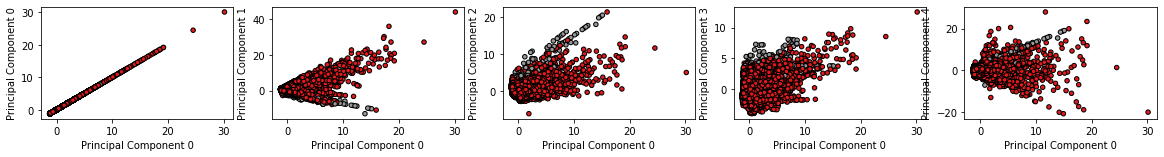

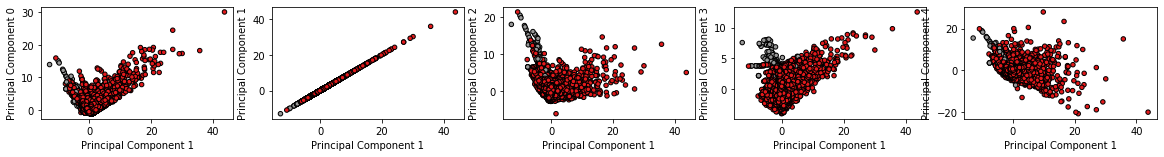

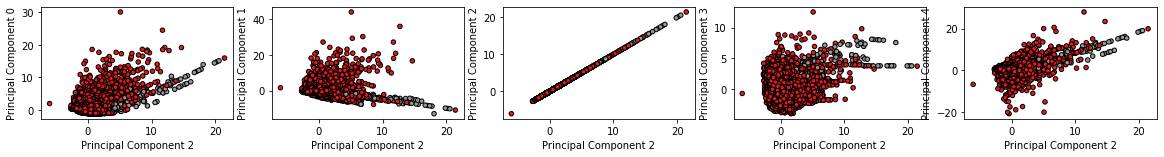

In [21]:
# 2D plot
for j in range(X_train_dim5.shape[1]):
    fig = plt.figure(figsize=(20, 7))
    for i in range(X_train_dim5.shape[1]):
        plt.subplot(3, 5, i+1)
        xs = X_train_dim5[:,j]
        ys = X_train_dim5[:,i]
        plt.scatter(x=xs, y=ys, c= Y_train_dim3,cmap=plt.cm.Set1, edgecolor="k", s=20)   
        plt.xlabel("Principal Component {}".format(j))
        plt.ylabel("Principal Component {}".format(i))
    plt.show()

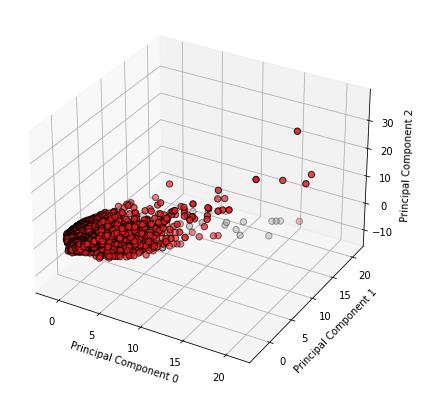

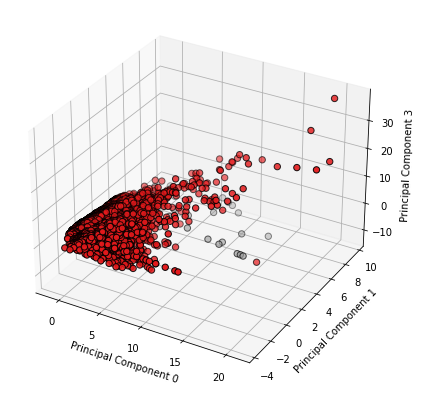

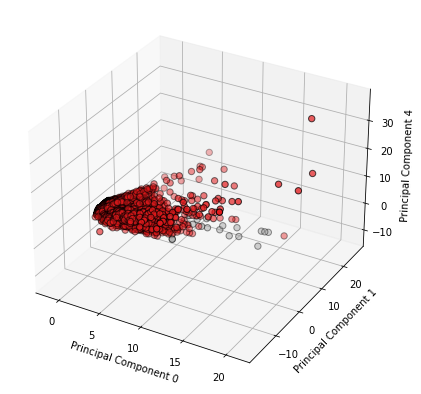

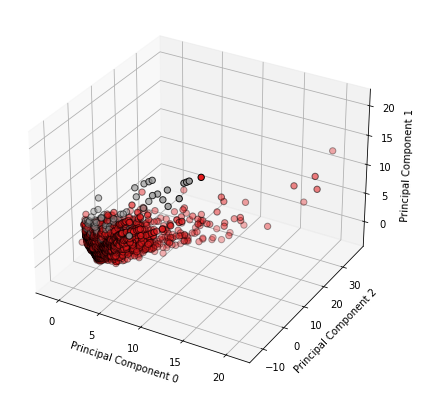

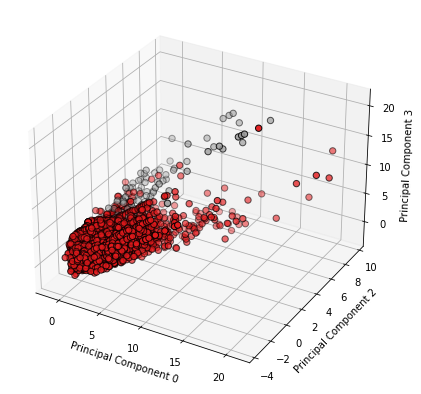

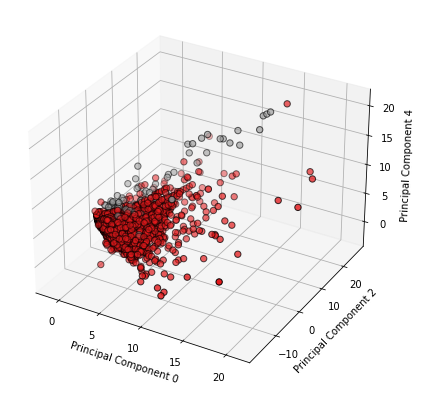

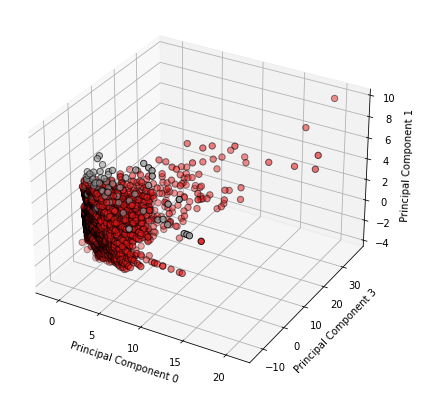

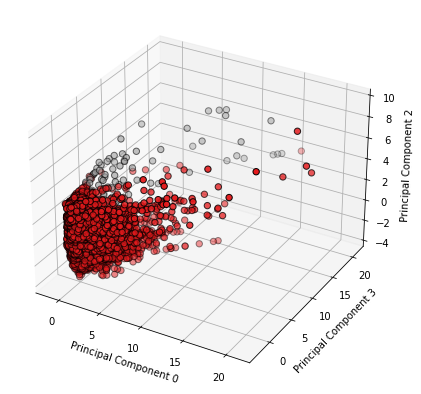

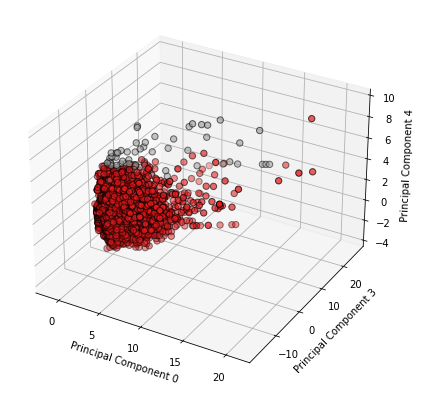

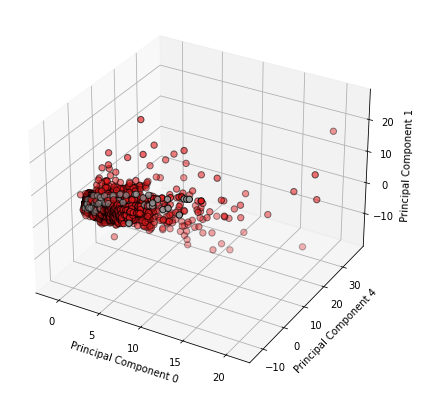

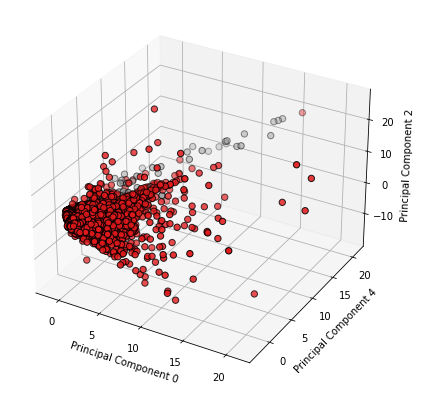

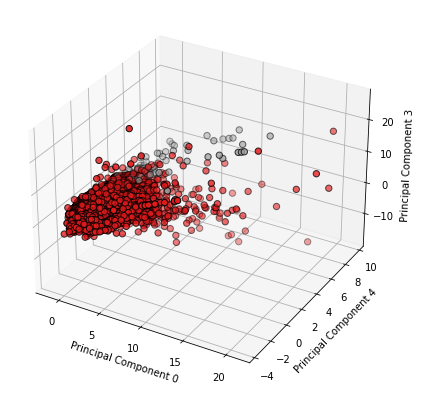

In [ ]:
# 3D plot
for j in range(X_test_dim5.shape[1]):
    for i in range(X_test_dim5.shape[1]):
        if(i!=j and i!=0 and j!= 0):
            fig = plt.figure(figsize=(20, 7))
            # create a 3D object 
            ax = fig.add_subplot(111, projection='3d')

            xs = X_test_dim5[:,0]
            ys = X_test_dim5[:,i]
            zs = X_test_dim5[:,j]

            # plotting the datapoints in the 3D object
            ax.scatter(xs=xs, ys=ys, zs=zs, c= Y_test_dim5,cmap=plt.cm.Set1, edgecolor="k", s=40)
            ax.set_xlabel("Principal Component 0")
            ax.set_ylabel("Principal Component {}".format(j))
            ax.set_zlabel("Principal Component {}".format(i))
            plt.show()

### 3.3 Linear Discriminant Analysis (LDA) 

In comparison to PCA, LDA takes the class into consideration and extracts the features to the number of classes - 1. In the case of the binary problem of the financial transaction task, this reduction results in one feature. 

In [ ]:
# import the LDA from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# set the number of kept fertures to 15
lda = LDA()
lda.fit(X, Y)
# apply dimensionality reduction to X.
X_LDA = lda.transform(X)

print('X_LDA.shape: {}'.format(X_LDA.shape))


X_LDA.shape: (227845, 1)


#### 3.3.1 Split and normalize the data 
Split the data into training and test data. 

In [ ]:

X_train_LDA, X_test_LDA, Y_train_LDA, Y_test_LDA = split_and_normalize_data(X_LDA, Y)


X_train.shape: (159491, 1)
Y_train.shape: (159491,)
X_test.shape: (68354, 1)
Y_test.shape: (68354,)


### 3.3.2 Train and test the model LDA

In [ ]:
model_LDA = train_model(X_train_LDA, Y_train_LDA)

predictions_LDA = model_predictions(model_LDA, X_test_LDA)

accuracy_LDA = evaluate_predictions(Y_test_LDA, X_test_LDA, predictions_LDA, model_LDA)

True Fraudulent(TP)  =  73
False Fraudulent(FP) =  6
True Not Fraudulent(TN)  =  68236
False Not Fraudulent(FN) =  39
Accuracy of the binary classification =  0.9993416625215789


### 3.4 Compare the three reduction approaches of the Dimension

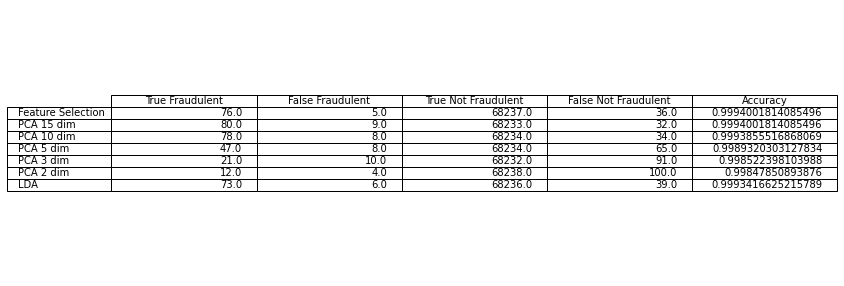

In [ ]:
fig, ax =plt.subplots(figsize=(13 , 5))
data=[accuracy_selcetion, accuracy_PCA_15, accuracy_PCA_10, accuracy_PCA_5, accuracy_PCA_3, accuracy_PCA_2,accuracy_LDA]
column_labels=["True Fraudulent", "False Fraudulent", "True Not Fraudulent","False Not Fraudulent", "Accuracy"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,
        colLabels=df.columns,
        rowLabels=["Feature Selection","PCA 15 dim","PCA 10 dim","PCA 5 dim","PCA 3 dim","PCA 2 dim","LDA"],
        loc="center")

plt.show()

## 4. Save and load the final Model

Comparing all results of the three attempts the PCA is the worst. It needs more features to acquire the same accuracy as the two others. The first approach with selecting four suitable features is slightly more accurate than the linear discriminate analysis. The first approach will be used for reducing the dimension and the features.  

In [ ]:
#Save the model
filename = 'logistic_regression_model.sav'
pickle.dump(model_feature_selection, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)